<a href="https://colab.research.google.com/github/JoaoPariss/MODULO-32---RANDOM-FOREST/blob/main/Cientista_de_Dados_Pratique_M32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [12]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Tipo dos dados está correto. Não há dados faltantes.

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


A.

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Parece haver outliers nas seguintes variáveis:


*   Residual Sugar
*   Free Sulfur Dioxide
*   Total Sulfur Dioxide

Vamos analisar cada uma com gráfico de boxplot.





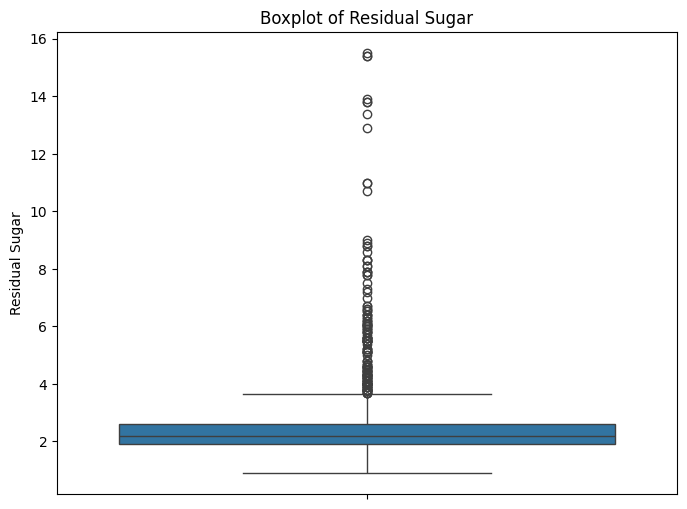

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['residual sugar'])
plt.title('Boxplot de Residual Sugar')
plt.ylabel('Residual Sugar')
plt.show()

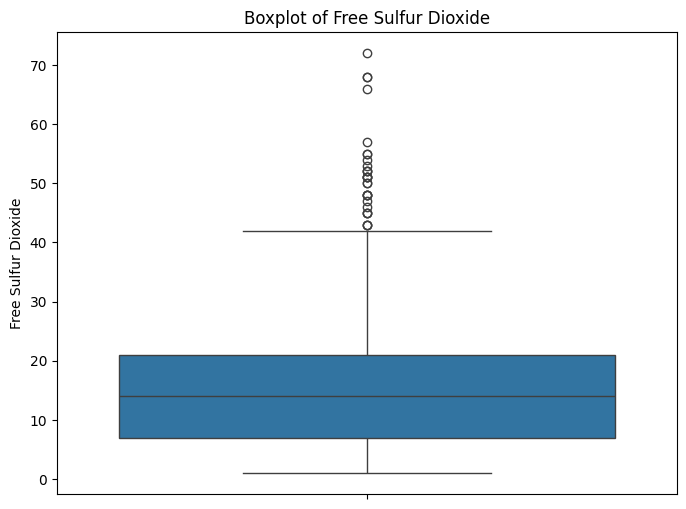

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['free sulfur dioxide'])
plt.title('Boxplot de Free Sulfur Dioxide')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

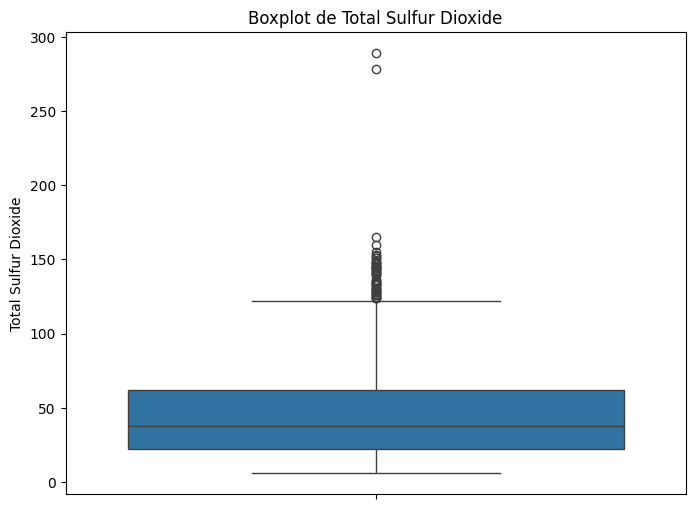

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['total sulfur dioxide'])
plt.title('Boxplot de Total Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

O gráfico boxplot aponta outliers nas variáveis que tínhamos suspeitado.

Antes de fazermos ajustes nestas variáveis vamos analisar se elas possuem forte correlação com a variável target e se serão utilizadas no modelo.

B.

In [27]:
print('Balanceamento da variável target:', df['quality'].value_counts())

Balanceamento da variável target: quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [29]:
print('Proporção da variável target:', df['quality'].value_counts(normalize=True))

Proporção da variável target: quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64


Os dados são desbalanceados, sendo muito concentrados, aproximadamente 82%,  entre 5 e 6.

C.

In [34]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


As variáveis mais fortes são:


1.   alcohol : (0.47)
2.   volatile acidity : (-0.39)
3.   sulphates : (0.25)
4.   citric acid : (0.22)


In [ ]:
D.

In [36]:
df_novo = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']]
df_novo.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,9.4,0.70,0.56,0.00,5
1,9.8,0.88,0.68,0.00,5
2,9.8,0.76,0.65,0.04,5
3,9.8,0.28,0.58,0.56,6
4,9.4,0.70,0.56,0.00,5


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [38]:
X = df_novo.drop('quality', axis=1)
y = df_novo['quality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [41]:
rf_model = RandomForestClassifier(random_state=42)

In [42]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [44]:
acurracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Acurácia:', acurracy)
print('Relatório de Classificação:\n', report)
print('Matriz de Confusão:\n', conf_matrix)

Acurácia: 0.609375
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.66      0.73      0.70       130
           6       0.58      0.58      0.58       132
           7       0.52      0.52      0.52        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.46      0.32      0.33       320
weighted avg       0.61      0.61      0.60       320

Matriz de Confusão:
 [[ 0  0  1  0  0  0]
 [ 0  1  5  4  0  0]
 [ 0  0 95 34  1  0]
 [ 0  0 41 77 14  0]
 [ 0  0  1 18 22  1]
 [ 0  0  0  0  5  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 A.

 O modelo apresenta uma acurácia relativamente baixa, de 0,61. Ao analisar o F1-score das classes é possível observar discrepâncias, pois para a qualidade 5 o modelo apresenta um score melhor, de 0,72, já para classes como 3, 4 e 8 o modelo parece não ter conseguido classificá-los com êxito.

B.

 Possivelmente esse desempenho baixo do modelo esteja ligado ao desbalanceamento de classes. Visto que, as classes 5 e 6, mais predominantes na base, representando mais de 82%, foram as com previsões mais acertivas. Já as outras, que possuíam percentuais pequenos, tiveram um desempenho inferior.

Por causa desse desbalanceamento, o modelo pode não ter aprendido a reconhecer bem as classes com poucos exemplos. Como teve muito mais dados das classes 5 e 6, ele acabou se ajustando mais a elas. Com isso, conseguiu fazer previsões nessas classes, mas teve dificuldade nas demais. Isso mostra que o modelo ficou enviesado para o que mais aparece na base.

# 6 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

A.

In [45]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [48]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

In [50]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [51]:
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


B.

In [52]:
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [57]:
y_pred_best = best_rf_model.predict(X_test)

C.

In [58]:
accuracy = accuracy_score(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.62
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.73      0.70       130
           6       0.58      0.61      0.59       132
           7       0.55      0.52      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.58      0.62      0.60       320

Matriz de Confusão:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 95 34  1  0]
 [ 0  0 39 80 13  0]
 [ 0  0  1 19 22  0]
 [ 0  0  0  1  4  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


D.

É possível observar uma leve melhora na acurácia, de 0,61 para 0,62. Contudo, ao analisar o F1-score, é possível observar que o modelo se ajustou ainda mais às classes majoritárias. Visto que, dessa vez, o modelo não conseguiu prever nenhuma vez a classe 4 corretamente. Já para as classes 6 e 7 houve um pequeno aumento no F1-score.

# 7 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Embora as árvores de decisão, em geral, lidem melhor com bases desbalanceadas e sem padronização do que a regressão logística, a análise do F1-score por classe mostrou que o desbalanceamento ainda impactou negativamente o desempenho do modelo. As classes com poucos exemplos tiveram resultados bem inferiores, o que indica que o modelo teve dificuldade em aprender seus padrões. Isso reforça a importância de preparar bem os dados antes do treinamento.

Por isso, uma forma de melhorar as previsões seria padronizar os dados e aplicar técnicas de balanceamento entre as classes. Essas etapas ajudariam o modelo a tratar todas as classes de forma mais equilibrada, aumentando suas chances de generalizar melhor e fazer previsões mais acertivas.

